# POS ( Part Of Speech ) 

In [9]:
import re
from string import punctuation
from nltk.tokenize import word_tokenize

sentence = "She sells seashells on the seashore."
# tokens = word_tokenize(sentence)

pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))

sentence = pattern.sub("",sentence)
tokens = word_tokenize(sentence)

result=[]
for token in tokens:
    if pattern.search(token):
        print(token)
    else:
        result.append(token.lower())  # 다 소문자로
        
result

['she', 'sells', 'seashells', 'on', 'the', 'seashore']

In [2]:
tokens

['She', 'sells', 'seashells', 'on', 'the', 'seashore', '.']

In [25]:
from nltk import pos_tag
# import nltk
# nltk.download('averaged_perceptron_tagger')
pos_tag(result)  

# 품사로도 거를 수 있음 

tags =[]
for term in pos_tag(result):
    if term[1] in ["IN","DT"]:
        print("Skipped",term[0])
    else:
        print(term[0])
        tags.append(term[0])
        
tags

she
sells
seashells
Skipped on
Skipped the
seashore


['she', 'sells', 'seashells', 'seashore']

In [20]:
# import nltk
# nltk.download('tagsets')
from nltk.help import brown_tagset, upenn_tagset

# 태그셋마다 품사가 다름 !

upenn_tagset("N.*")  # 위는 이 태그셋을 씀       / N.*  : N으로 시작하는거면 모두 다 
# brown_tagset()

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [21]:
upenn_tagset("VBZ")

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


In [27]:
# 다른 문장

sentence = "The little yellow dog barked at the Persian Cat."

pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))

sentence = pattern.sub("",sentence)
tokens = word_tokenize(sentence)

result=[]
for token in tokens:
    if pattern.search(token):
        print(token)
    else:
        result.append(token.lower())  # 다 소문자로
        
result


tags =[]
for term in pos_tag(result):
    if term[1] in ["IN","DT"]:
        print("Skipped",term[0])
    else:
        print(term[0])
        tags.append(term[0])
        
tags
# 의미를 갖고있는 최소한의 단어를 뽑아냄!

Skipped the
little
yellow
dog
barked
Skipped at
Skipped the
persian
cat


['little', 'yellow', 'dog', 'barked', 'persian', 'cat']

In [40]:
from nltk.tag import untag    # 무언가를 벗기겠다.

tagged = pos_tag(result)
untag(tagged)

[tag[0] for tag in tagged]

['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'persian', 'cat']

In [44]:
# ["/".join(tag) for tag in tagged]

from nltk import Text
tagged = pos_tag(result)

textObj = Text(tagged)  # 튜플 형식
textObj.vocab().N()  # 몇 개의 term이 있는지
textObj.vocab().freq(('the','DT'))    #  확률값 
textObj.vocab().keys()  # 키들만 가져옴 

dict_keys([('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('persian', 'JJ'), ('cat', 'NN')])

In [45]:
for key in textObj.vocab().keys():
    if textObj.vocab().freq(key) > 0.2:
        print("Skipped", key)     # 확률이 0.2 이상이면 잘린다

Skipped ('the', 'DT')


In [71]:
from nltk.probability import FreqDist
from collections import defaultdict

taggedTerms = FreqDist()
# taggedTerms = defaultdict(int)      # 위나 아래나 똑같음 

for key in textObj.vocab().keys():
    if key[1].startswith("N"):
        taggedTerms[key] += 1

# Key = tuple(단어, 품사)   / join으로 (단어/품사) 만들 수 있다. 

for key in textObj.vocab().keys():
    if key[1].startswith("DT"):
        # key[1] in ["DT"]
        # re.search(r"DT.*")
        taggedTerms[key] += textObj.vocab().get(key)
        
taggedTerms, taggedTerms.N()

(FreqDist({('the', 'DT'): 2, ('dog', 'NN'): 1, ('cat', 'NN'): 1}), 4)

In [80]:
from nltk.corpus import gutenberg

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
corpus = pattern.sub("",corpus)
tokens = word_tokenize(corpus)  # 구두점 싹 다 날림 
tagged = pos_tag(tokens)  # ( 단어, 태그)

wordList = [pair[0] for pair in tagged]
posList =[pair[1] for pair in tagged]

In [81]:
len(tokens), len(tagged), len(wordList), len(posList)

(158270, 158270, 158270, 158270)

In [106]:
# 3개 그래프 모양의 차이 
freqTokens = FreqDist()
for row in tokens: 
    freqTokens[row] += 1


freqTagged = FreqDist()
for row in tagged: # tuple(단어,품사)
    freqTagged[row] += 1
    
freqWord = FreqDist()
for row in wordList: # 단어
    freqWord[row] += 1
    
freqPos = FreqDist()
for row in posList: # 품사
    freqPos[row] += 1

In [92]:
freqTagged.most_common(10), freqWord.most_common(10),freqPos.most_common(10)

([(('to', 'TO'), 5099),
  (('the', 'DT'), 4822),
  (('and', 'CC'), 4412),
  (('of', 'IN'), 4264),
  (('I', 'PRP'), 2968),
  (('a', 'DT'), 2962),
  (('was', 'VBD'), 2369),
  (('not', 'RB'), 2227),
  (('in', 'IN'), 2086),
  (('it', 'PRP'), 2041)],
 [('to', 5099),
  ('the', 4822),
  ('and', 4412),
  ('of', 4264),
  ('I', 2968),
  ('a', 2962),
  ('was', 2369),
  ('her', 2333),
  ('not', 2227),
  ('in', 2086)],
 [('NN', 18524),
  ('IN', 17875),
  ('PRP', 14866),
  ('RB', 12479),
  ('DT', 12276),
  ('JJ', 10305),
  ('NNP', 9863),
  ('VB', 9022),
  ('VBD', 8948),
  ('CC', 6445)])

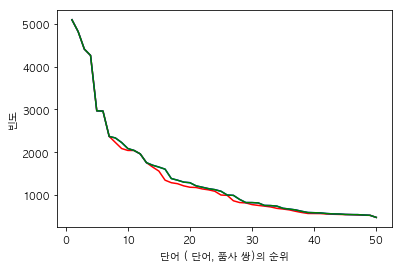

In [108]:
# Zif's Law   :    순위에 반비례
from matplotlib import font_manager, rc

path='/Library/Fonts/AppleGothic.ttf'

family = font_manager.FontProperties(fname=path).get_name()
rc('font' ,family=family)

import matplotlib.pyplot as plt

x = range(1,51)
y = [pair[1] for pair in freqTagged.most_common(50)]
yy = [pair[1] for pair in freqWord.most_common(50)]
yyy = [pair[1] for pair in freqTokens.most_common(50)]
xx = range(1,11)
yyyy = [pair[1] for pair in freqPos.most_common(10)]


plt.plot(x,y,'r-')
plt.plot(x,yy,'b-')
plt.plot(x,yyy,'g-')
# 차원이 안맞아서 따로 그림 
# plt.plot(xx,yyyy,'g-')
plt.xlabel("단어 ( 단어, 품사 쌍)의 순위")
plt.ylabel("빈도")
plt.show()

In [109]:
# Heap's Law   : 전체 단어 중에 고유한 단어는 몇 개 있느냐를 보는 것 ( Unique Term )
# 나중에 봐보기

In [130]:
# 한글 데이터 이용 - Hannanum

from konlpy.tag import Hannanum

sen = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Hannanum()
obj.morphs(sen) # 형태소 단위로 분석
obj.pos(sen) # +품사
# obj.tagset # 태그셋 확인 
obj.nouns(sen) # 명사만 찾아냄 

['내', '우리', '나', '친구', '잠']

In [131]:
# 한글 데이터 이용 -  Kkma

from konlpy.tag import Kkma

sen = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Kkma()
obj.morphs(sen) # 형태소 단위로 분석
obj.pos(sen) # +품사         /   여기서는 "많이"를 부사로 찾아내고 있음
# obj.tagset # 태그셋 확인 
obj.nouns(sen) # 명사만 찾아냄 

['내', '우리', '이', '친구', '잠']

In [132]:
# 한글 데이터 이용 -  Komoran

from konlpy.tag import Komoran

sen = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Komoran()
obj.morphs(sen) # 형태소 단위로 분석
obj.pos(sen) # +품사         /   여기서도 "많이"를 부사로 찾아내고 있음
# obj.tagset # 태그셋 확인 
obj.nouns(sen) # 명사만 찾아냄    / 하지만 명사리스트에서 "내"를 지웠음   ( "대명사"를 제외시킨 것 )

['친구', '잠']

In [141]:
# 한글 데이터 이용 -  Okt

from konlpy.tag import Okt

sen = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Okt()
obj.morphs(sen) # 형태소 단위로 분석
obj.pos(sen) # +품사         /   여기서도 "많이"를 부사로 찾아내고 있음
# obj.tagset # 태그셋 확인 
obj.nouns(sen) # 명사만 찾아냄    /   "대명사"  그대로 출력됨. 

['내', '우리', '그', '이', '나', '친구', '잠']

# 형태소 분리 성능

Kkma > Komoran = Okt > Hannanum

# 품사 분석 성능

Kkma > Komoran = Okt > Hannanum

# 명사 분석 성능

Kkma = Hannanum = Okt   => 대명사 포함(모든 명사)
Komoran  => 대명사 제거

* Mecab이라는게 제일 좋지만 Windows에서는 돌지 않는다. 
* Twitter가 upgrade된 것이, Okt이다. 

# 국립국어원 - 세종21

https://ithub.korean.go.kr/user/corpus/corpusSearchManager.do

국립국어원 - 말뭉치 - 찾기 - 형태분석

In [143]:
sentence="구해지지 않는 직장을 구하느니 고향친구 경자가 시집가느라 내놓은 인조꽃가게를 돈벌면 갚기로 하고 우선 넘겨받았다."

# obj = Okt()
# obj.morphs(sentence) # 형태소 단위로 분석
# obj.pos(sentence) # +품사         /   여기서도 "많이"를 부사로 찾아내고 있음
# # obj.tagset # 태그셋 확인 
# # obj.nouns(sentence) # 명사만 찾아냄    /   "대명사"  그대로 출력됨. 

obj = Kkma()
obj.morphs(sentence) # 형태소 단위로 분석
obj.pos(sentence) # +품사         /   여기서는 "많이"를 부사로 찾아내고 있음
# obj.tagset # 태그셋 확인 
# obj.nouns(sentence) # 명사만 찾아냄 

[('구하', 'VV'),
 ('어', 'ECS'),
 ('지', 'VXV'),
 ('지', 'ECD'),
 ('않', 'VXV'),
 ('는', 'ETD'),
 ('직장', 'NNG'),
 ('을', 'JKO'),
 ('구하', 'VV'),
 ('느니', 'ECE'),
 ('고향', 'NNG'),
 ('친구', 'NNG'),
 ('경자', 'NNG'),
 ('가', 'JKS'),
 ('시집가', 'VV'),
 ('느라', 'ECD'),
 ('내놓', 'VV'),
 ('은', 'ETD'),
 ('인조', 'NNG'),
 ('꽃', 'NNG'),
 ('가게', 'NNG'),
 ('를', 'JKO'),
 ('돈', 'NNG'),
 ('벌', 'VV'),
 ('면', 'ECE'),
 ('갚', 'VV'),
 ('기로', 'ECD'),
 ('하', 'VV'),
 ('고', 'ECE'),
 ('우선', 'MAG'),
 ('넘겨받', 'VV'),
 ('았', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF')]

# 한글에 대해 다시 그래프 그리기

In [145]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = Kkma().pos(corpus)

In [148]:
# 형태소 분석하니 갯수가 엄청나게 늘어남...!
len(word_tokenize(corpus)), len(tokens), tokens[0]

(4640, 10053, ('대한민국', 'NNG'))

In [151]:
rawList = FreqDist()
pairList = FreqDist()
wordList = FreqDist()
posList = FreqDist()

for term in word_tokenize(corpus):
    rawList[term] += 1

for pair in tokens:
    pairList[pair] += 1
    wordList[pair[0]] += 1
    posList[pair[1]] += 1
    


In [152]:
len(rawList), len(pairList), len(wordList), len(posList)

(2023, 1294, 1247, 38)

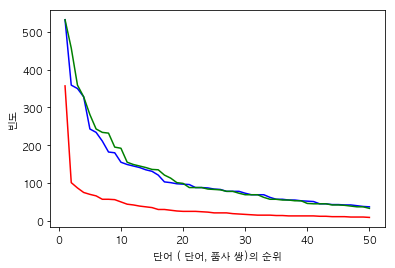

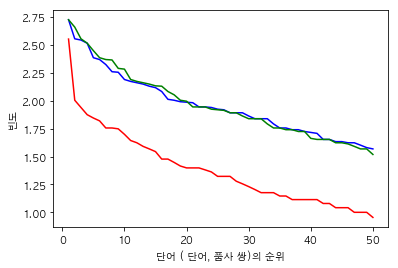

In [159]:
# Zif's Law   :    순위에 반비례
import matplotlib.pyplot as plt
import math

x = range(1,51)
y = [pair[1] for pair in rawList.most_common(50)]
yy = [pair[1] for pair in pairList.most_common(50)]
yyy = [pair[1] for pair in wordList.most_common(50)]
# 품사
xx = range(1,11)
yyyy = [pair[1] for pair in posList.most_common(10)]


_y = [math.log10(_) for _ in y]
_yy = [math.log10(_) for _ in yy]
_yyy = [math.log10(_) for _ in yyy]

plt.plot(x,y,'r-')
plt.plot(x,yy,'b-')
plt.plot(x,yyy,'g-')


# 차원이 안맞아서 따로 그림 
# plt.plot(xx,yyyy,'g-')
plt.xlabel("단어 ( 단어, 품사 쌍)의 순위")
plt.ylabel("빈도")
plt.show()

# 형태소 단위로 분리하다 보니까 차이가 큼 


plt.plot(x,_y,'r-')
plt.plot(x,_yy,'b-')
plt.plot(x,_yyy,'g-')
plt.xlabel("단어 ( 단어, 품사 쌍)의 순위")
plt.ylabel("빈도")
plt.show()

# 더 일반화된 규칙을 따른다고 볼 수 있다. 
# 아래와 같은 그래프 모양을 만들어야한다. raw Text 바로 사용 X

# 수집한 뉴스데이터에 적용

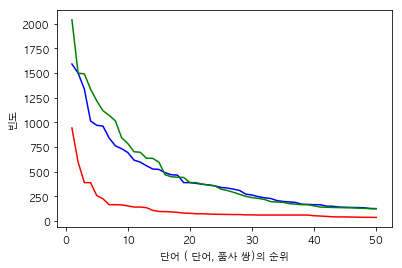

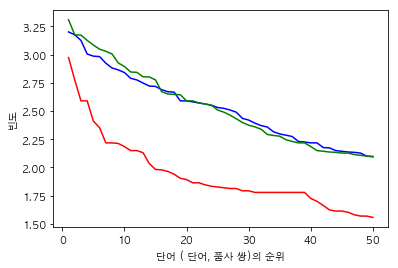

In [174]:
# Zif's Law   :    순위에 반비례
import matplotlib.pyplot as plt
import math
import os

corpus = ""
for file in os.listdir("./News"):
    if file.endswith(".txt"):
        with open("./News/" + file, encoding='utf-8') as f:
            corpus += f.read()

rawList = FreqDist()
pairList = FreqDist()
wordList = FreqDist()
posList = FreqDist()

for term in word_tokenize(corpus):
    rawList[term] += 1

tokens = Kkma().pos(corpus)  

for pair in tokens:
    pairList[pair] += 1
    wordList[pair[0]] += 1
    posList[pair[1]] += 1
    

x = range(1,51)
y = [pair[1] for pair in rawList.most_common(50)]
yy = [pair[1] for pair in pairList.most_common(50)]
yyy = [pair[1] for pair in wordList.most_common(50)]
# 품사
xx = range(1,11)
yyyy = [pair[1] for pair in posList.most_common(10)]


_y = [math.log10(_) for _ in y]
_yy = [math.log10(_) for _ in yy]
_yyy = [math.log10(_) for _ in yyy]

plt.plot(x,y,'r-')
plt.plot(x,yy,'b-')
plt.plot(x,yyy,'g-')


# 차원이 안맞아서 따로 그림 
# plt.plot(xx,yyyy,'g-')
plt.xlabel("단어 ( 단어, 품사 쌍)의 순위")
plt.ylabel("빈도")
plt.show()

# 형태소 단위로 분리하다 보니까 차이가 큼 


plt.plot(x,_y,'r-')
plt.plot(x,_yy,'b-')
plt.plot(x,_yyy,'g-')
plt.xlabel("단어 ( 단어, 품사 쌍)의 순위")
plt.ylabel("빈도")
plt.show()

# log했을 때, 반비례로 매우 잘 나타난 모습을 볼 수 있다. 

# + n-gram 적용

In [164]:
def ngramEojeol(sentence, n=2):
#     입력 : 단어1, 단어2, 단어3, 단어4 : 4
#     출력(2) : 단어12, 단어23, 단어34 : 3 - n + 1
#     출력(3) : 단어123, 단어234 : 2 - n + 1 
    tokens =sentence.split()
    ngram = []
    
    for i in range(len(tokens) - n + 1):
        ngram.append(" ".join(tokens[i:i+n]))
    
    return ngram

In [165]:
def ngramUmjeol(term, n=2):
#     입력 : 단어1, 단어2, 단어3, 단어4 : 4
#     출력(2) : 단어12, 단어23, 단어34 : 3 - n + 1
#     출력(3) : 단어123, 단어234 : 2 - n + 1 
    ngram = []
    
    for i in range(len(term) - n + 1):
#          ngram.append(tuple(term[i:i+n]))
        ngram.append("".join(tuple(term[i:i+n])))   # 음절을 붙임
    return ngram



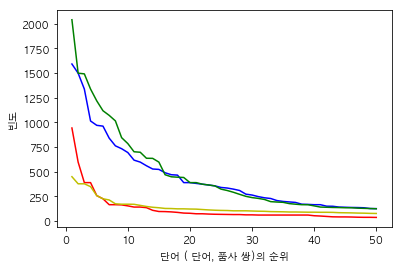

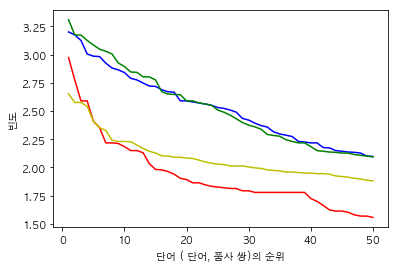

In [180]:
ngramList = FreqDist()

for term in word_tokenize(corpus):
    for token in ngramUmjeol(term):
        ngramList[token] += 1
        


x = range(1,51)
y = [pair[1] for pair in rawList.most_common(50)]
yy = [pair[1] for pair in pairList.most_common(50)]
yyy = [pair[1] for pair in wordList.most_common(50)]
# 품사
xx = range(1,11)
yyyy = [pair[1] for pair in posList.most_common(10)]


_y = [math.log10(_) for _ in y]
_yy = [math.log10(_) for _ in yy]
_yyy = [math.log10(_) for _ in yyy]


ngramY = [pair[1] for pair in ngramList.most_common(50)]
ngramYY = [math.log10(_) for _ in ngramY]


plt.plot(x,y,'r-')
plt.plot(x,yy,'b-')
plt.plot(x,yyy,'g-')
plt.plot(x,ngramY,'y-')

# 차원이 안맞아서 따로 그림 
# plt.plot(xx,yyyy,'g-')
plt.xlabel("단어 ( 단어, 품사 쌍)의 순위")
plt.ylabel("빈도")
plt.show()

plt.plot(x,_y,'r-')
plt.plot(x,_yy,'b-')
plt.plot(x,_yyy,'g-')
plt.plot(x,ngramYY,'y-')
# plt.plot(x,ngramYY,'g-')
plt.xlabel("단어 ( 단어, 품사 쌍)의 순위")
plt.ylabel("빈도")
plt.show()

# Collocations 


단어의 특정한 열이다. 

Occurance가 가장 높은 애들 / 한 문맥, 문장안에 다른 위치에 있어도 같이 많이 나온 애들 

# 단어, 품사 쌍

In [211]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk import pos_tag
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = word_tokenize(corpus)
result = pos_tag(tokens)
tokens = [row for row in result if len(row[0]) > 2]  # 형태소 분석기까지 돌리기 ! 


# 쌍을 찾을 것
bigram = BigramCollocationFinder.from_words(tokens)

# pmi 가지고 Best 쌍 찾기
bigram.nbest(BigramAssocMeasures().pmi, 10)
# chi_sq 가지고 Best 쌍 찾기
# 단어를 다 별도로 인식했을 것. 
bigram.nbest(BigramAssocMeasures().chi_sq, 10)


[(('26th', 'CD'), ('ult.', 'NN')),
 (('Abominable', 'JJ'), ('scoundrel', 'NN')),
 (('Agricultural', 'NNP'), ('Reports', 'NNP')),
 (('Always', 'NNP'), ('deceived', 'VBD')),
 (('Austen', 'NNP'), ('1816', 'CD')),
 (('Baronne', 'NNP'), ("d'Almane", 'NN')),
 (('Books', 'NNP'), ('engravings', 'NNS')),
 (('Candles', 'NNP'), ('everywhere.', 'VBP')),
 (('Clayton', 'NNP'), ('Park', 'NNP')),
 (('Comtesse', 'NNP'), ("d'Ostalis", 'NN'))]

# 품사 쌍

In [208]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk import pos_tag
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = word_tokenize(corpus)
result = pos_tag(tokens)
tokens = [row[1] for row in result if len(row[0]) > 2]  # 형태소 분석기까지 돌리기 ! 


# 쌍을 찾을 것
bigram = BigramCollocationFinder.from_words(tokens)

# pmi 가지고 Best 쌍 찾기
bigram.nbest(BigramAssocMeasures().pmi, 10)
# chi_sq 가지고 Best 쌍 찾기
# 단어를 다 별도로 인식했을 것. 
bigram.nbest(BigramAssocMeasures().chi_sq, 10)



[('NNP', 'NNP'),
 ('DT', 'NN'),
 ('MD', 'VB'),
 ('JJ', 'NN'),
 ('PRP', 'VBD'),
 ('PRP$', 'NN'),
 ('MD', 'RB'),
 ('PRP', 'VBP'),
 ('VBD', 'VBN'),
 ('PRP', 'MD')]

In [212]:
# 우리가 찾아낸 것과 비슷
bigram.ngram_fd.most_common()

[((('had', 'VBD'), ('been', 'VBN')), 308),
 ((('could', 'MD'), ('not', 'RB')), 277),
 ((('Mr.', 'NNP'), ('Knightley', 'NNP')), 274),
 ((('and', 'CC'), ('the', 'DT')), 257),
 ((('she', 'PRP'), ('had', 'VBD')), 254),
 ((('Mrs.', 'NNP'), ('Weston', 'NNP')), 246),
 ((('she', 'PRP'), ('was', 'VBD')), 218),
 ((('Mr.', 'NNP'), ('Elton', 'NNP')), 211),
 ((('that', 'IN'), ('she', 'PRP')), 186),
 ((('did', 'VBD'), ('not', 'RB')), 179),
 ((('for', 'IN'), ('the', 'DT')), 172),
 ((('Miss', 'NNP'), ('Woodhouse', 'NNP')), 167),
 ((('any', 'DT'), ('thing', 'NN')), 163),
 ((('all', 'PDT'), ('the', 'DT')), 161),
 ((('was', 'VBD'), ('not', 'RB')), 161),
 ((('Mr.', 'NNP'), ('Weston', 'NNP')), 158),
 ((('have', 'VB'), ('been', 'VBN')), 156),
 ((('would', 'MD'), ('not', 'RB')), 144),
 ((('Frank', 'NNP'), ('Churchill', 'NNP')), 144),
 ((('Mrs.', 'NNP'), ('Elton', 'NNP')), 140),
 ((('can', 'MD'), ('not', 'RB')), 139),
 ((('she', 'PRP'), ('could', 'MD')), 138),
 ((('would', 'MD'), ('have', 'VB')), 137),
 ((('M

# 한글 적용!

In [218]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = Kkma().pos(corpus)

# 단어 따로, 품사 따로 출력할 수 있음. 
tokens = [pair[0] for pair in Kkma().pos(corpus)]

# 쌍을 찾을 것
bigram = BigramCollocationFinder.from_words(tokens)
# pmi 가지고 Best 쌍 찾기
bigram.nbest(BigramAssocMeasures().pmi, 10)
# chi_sq 가지고 Best 쌍 찾기
# 단어를 다 별도로 인식했을 것. 
bigram.nbest(BigramAssocMeasures().chi_sq, 10)

[('가부', '동수'),
 ('강제', '노역'),
 ('경자', '유전'),
 ('공무', '담임'),
 ('공중', '도덕'),
 ('과반', '수가'),
 ('교전', '상태'),
 ('기본적', '인권'),
 ('내부', '규율'),
 ('노인과', '청소년')]

# 뉴스기사 적용

수집한거로 하니 잘 안나옴,, 

균형이 잘 안잡혀있는 것 ! 

서로 다 다른이야기를 하고있음.

데이터 부족도 문제! ( 카테고리를 특정 짓지 못함 )

In [226]:
corpus = ""
for file in os.listdir("./News"):
    if file.startswith("세계") and file.endswith(".txt"):
        with open("./News/" + file, encoding='utf-8') as f:
            corpus += f.read()
            
# 단어 따로, 품사 따로 출력할 수 있음. 
tokens = [pair for pair in Kkma().nouns(corpus)]   # nouns는 명사만 가져옴 

# 쌍을 찾을 것
bigram = BigramCollocationFinder.from_words(tokens)
# pmi 가지고 Best 쌍 찾기
bigram.nbest(BigramAssocMeasures().pmi, 10)
# chi_sq 가지고 Best 쌍 찾기
# 단어를 다 별도로 인식했을 것. 
bigram.nbest(BigramAssocMeasures().chi_sq, 10)

[('1', '1시간'),
 ('10', '10월'),
 ('100', '보'),
 ('100건', '예방'),
 ('10배', '100건'),
 ('10월', '라이'),
 ('10일', '여객기'),
 ('11', '11일'),
 ('11월', '후난성'),
 ('11일', '인도네시아')]